### $m_{DM} = 4.0 \times 10^8 M_{\odot}$  ;  $N_{DM}=455^3$

In [3]:
import illustris_python as il
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np

#import sys
#sys.path.insert(0,'/home/hungjinh/python_lib/CAMB/pycamb')
#import camb
#from camb import model, initialpower

from scipy import interpolate

%pylab inline

Populating the interactive namespace from numpy and matplotlib


SystemExit: camblib.so does not exist.
Please remove any old installation and install again.

In [8]:
%run ./cal_Pk_tool_ill.py

In [4]:
basePath = '/home/hungjinh/Research/baryon_proj/catalog/illustris_cat/Illustris-3/'
snap=135
boxsize=75.  # comoving Mpc/h
resol = 128
Vbox=boxsize**3

### DM particle

In [9]:
dm_hist=build_mass_cube_hydro_DM(snap=snap,basePath=basePath,Mptl=4.01e8,boxsize=boxsize,resol=resol)

In [10]:
dm_hist.sum()

3.7772746375e+16

### gas particle

In [11]:
gas_hist=build_mass_cube_hydro_baryon(snap=snap,basePath=basePath,ptl_type='gas',boxsize=boxsize,resol=resol)

In [5]:
gas_hist.sum()

5146800624827749.0

### star particle


In [12]:
star_hist=build_mass_cube_hydro_baryon(snap=snap,basePath=basePath,ptl_type='stars',boxsize=boxsize,resol=resol)

In [8]:
star_hist.sum()

186858612673537.12

### BH particle

In [13]:
BH_hist=build_mass_cube_hydro_baryon(snap=snap,basePath=basePath,ptl_type='bhs',boxsize=boxsize,resol=resol)

In [9]:
BH_hist.sum()

5707148840122.0

## Overdensity Cube

In [14]:
Mtot_hist=dm_hist+gas_hist+star_hist+BH_hist

In [15]:
# calculate average Mass in one pixel
avgM_per_pix = sum(Mtot_hist)/resol**3

In [16]:
# overdensity histogram [unitless]
den = (Mtot_hist-avgM_per_pix)/avgM_per_pix

## FFT start 

In [17]:
Amp_FFTden=cal_Amp_FFTden(den=den,resol=resol)

In [32]:
k=cal_freq_FFT(boxsize=boxsize,resol=resol)[0]

k_max: 9.286652744879195
kx_max: 5.277875658030853
kx_min: -5.361651462126581


In [38]:
k.shape

(128, 128, 128)

In [33]:
kbins=np.logspace(-1,1,23)
kbins

array([ 0.1       ,  0.12328467,  0.15199111,  0.18738174,  0.23101297,
        0.28480359,  0.35111917,  0.43287613,  0.53366992,  0.65793322,
        0.81113083,  1.        ,  1.23284674,  1.51991108,  1.87381742,
        2.3101297 ,  2.84803587,  3.51119173,  4.32876128,  5.33669923,
        6.57933225,  8.11130831, 10.        ])

In [37]:
avgk,avgPk,Nk=cal_Pk(kbins=kbins,Amp_FFTden=Amp_FFTden,k=k,Vbox=Vbox)

In [41]:
avgk

array([0.11847688, 0.14510395, 0.18337304, 0.20520797, 0.26010971,
       0.32244599, 0.39568276, 0.48399876, 0.59596783, 0.7381514 ,
       0.91171343, 1.12360787, 1.38756848, 1.71066786, 2.10658639,
       2.59672475, 3.20213546, 3.94860637, 4.86732175, 5.91680382,
       7.12591493, 8.39700823])

In [40]:
avgPk

array([3.63439156e+03, 7.26729640e+03, 1.76258608e+03, 2.05601389e+03,
       1.29517259e+03, 1.05774929e+03, 9.64847823e+02, 6.51006963e+02,
       5.31890241e+02, 4.35268773e+02, 3.40531055e+02, 2.57717202e+02,
       2.08214719e+02, 1.58388465e+02, 1.15412634e+02, 7.81515268e+01,
       4.90914389e+01, 2.97663777e+01, 1.83753604e+01, 1.17869562e+01,
       7.48266578e+00, 5.26778572e+00])

## CAMB

In [23]:
kh_camb,pk_camb=gen_camb_Pk_illustris_cosmology(redshifts=[0])

## Plot

(0.03, 35)

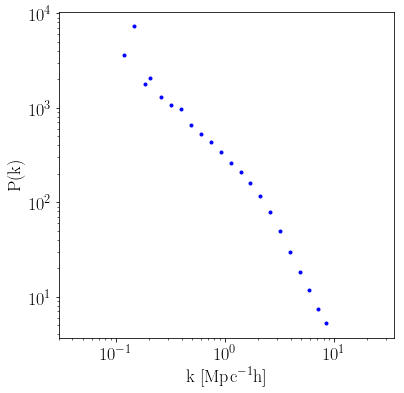

In [39]:
plt.figure(figsize=(6,6))
plt.rc('text', usetex=True)      
plt.rc('font',size=18) 

plt.plot(avgk,avgPk,'.',c='blue')
#plt.plot(kh_camb,pk_camb[0],c='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')
plt.ylabel(r'$\mathrm{P(k)}$')

plt.xlim(0.03,35)

In [23]:
k_DM=array([ 0.11847688,  0.14510395,  0.18337304,  0.20520797,  0.26010971,
        0.32244599,  0.39568276,  0.48399876,  0.59596783,  0.7381514 ,
        0.91171343,  1.12360787,  1.38756848,  1.71066786,  2.10658639,
        2.59672475,  3.20213546,  3.94860637,  4.86732175,  5.91680382,
        7.12591493,  8.39700823])

In [24]:
Pk_DM=array([  3.63834449e+03,   7.27960119e+03,   1.76722272e+03,
         2.06218723e+03,   1.30153042e+03,   1.06472058e+03,
         9.75576201e+02,   6.61566594e+02,   5.44519314e+02,
         4.50629275e+02,   3.58511733e+02,   2.76042449e+02,
         2.27766561e+02,   1.77010836e+02,   1.31349193e+02,
         9.04705522e+01,   5.76160020e+01,   3.53032024e+01,
         2.19071612e+01,   1.40342127e+01,   8.86082152e+00,
         6.17547834e+00])

In [25]:
k_DMO=array([ 0.11847688,  0.14510395,  0.18337304,  0.20520797,  0.26010971,
        0.32244599,  0.39568276,  0.48399876,  0.59596783,  0.7381514 ,
        0.91171343,  1.12360787,  1.38756848,  1.71066786,  2.10658639,
        2.59672475,  3.20213546,  3.94860637,  4.86732175,  5.91680382,
        7.12591493,  8.39700823])

In [26]:
Pk_DMO=array([  3.63377877e+03,   7.27067978e+03,   1.76571074e+03,
         2.06120058e+03,   1.29953749e+03,   1.06450689e+03,
         9.75391965e+02,   6.61546396e+02,   5.45543037e+02,
         4.52356183e+02,   3.60755314e+02,   2.79309302e+02,
         2.31456394e+02,   1.81552647e+02,   1.36594715e+02,
         9.53692529e+01,   6.18206736e+01,   3.84164248e+01,
         2.39473184e+01,   1.51767009e+01,   9.36192092e+00,
         6.38104978e+00])

(0.06, 15)

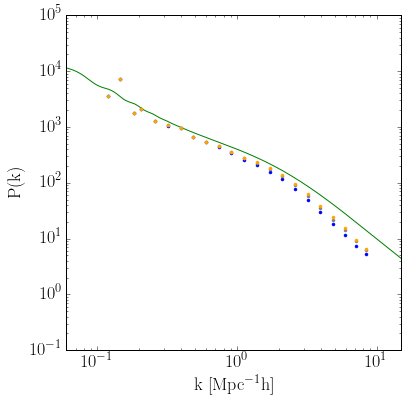

In [29]:
plt.figure(figsize=(6,6))
plt.rc('text', usetex=True)      
plt.rc('font',size=18) 

plt.plot(avgk,avgPk,'.',c='blue')
plt.plot(kh_camb,pk_camb[0],c='green')
plt.plot(k_DM,Pk_DM,'.',c='gray')
plt.plot(k_DMO,Pk_DMO,'.',c='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')
plt.ylabel(r'$\mathrm{P(k)}$')

plt.xlim(0.06,15)

## cp Pks 

In [31]:
f_Pk_DMO = interpolate.interp1d(k_DMO, Pk_DMO)
f_Pk_hydro_DM = interpolate.interp1d(k_DM, Pk_DM)
f_Pk_hydro    = interpolate.interp1d(avgk, avgPk)

iPk_DMO =f_Pk_DMO(kh_camb[57:237])
iPk_DM  =f_Pk_hydro_DM(kh_camb[57:237])
iPk_tot =f_Pk_hydro(kh_camb[57:237])

(0.06, 15)

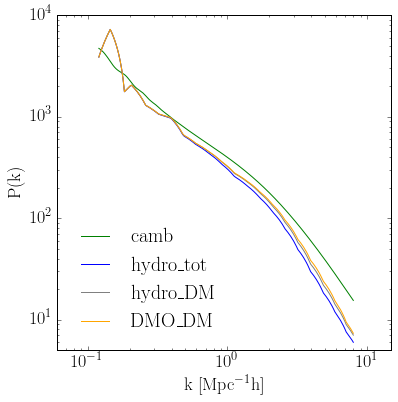

In [101]:
plt.figure(figsize=(6,6))
plt.rc('text', usetex=True)      
plt.rc('font',size=18) 

xvalue=kh_camb[57:237]
ipk_camb=pk_camb[0][57:237]

plt.plot(xvalue,ipk_camb,c='green',label=r'$\mathrm{camb}$')
plt.plot(xvalue,iPk_tot,c='blue',label=r'$\mathrm{hydro\_tot}$')
plt.plot(xvalue,iPk_DM,c='gray',label=r'$\mathrm{hydro\_DM}$')
plt.plot(xvalue,iPk_DMO,c='orange',label=r'$\mathrm{DMO\_DM}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')
plt.ylabel(r'$\mathrm{P(k)}$')

plt.legend(loc='lower left',frameon=False,prop={'size':20})

plt.ylim(5,1e4)
plt.xlim(0.06,15)

(0.06, 15)

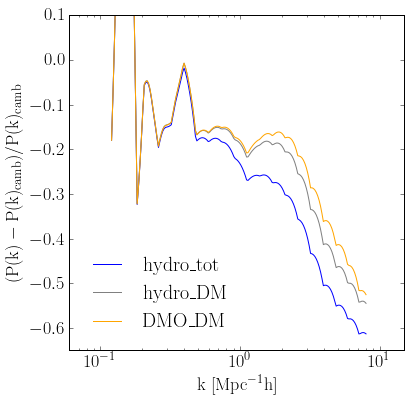

In [93]:
plt.figure(figsize=(6,6))
plt.rc('text', usetex=True)      
plt.rc('font',size=18) 

xvalue=kh_camb[57:237]
ipk_camb=pk_camb[0][57:237]


plt.plot(xvalue,(iPk_tot-ipk_camb)/ipk_camb,c='blue',label=r'$\mathrm{hydro\_tot}$')
plt.plot(xvalue,(iPk_DM-ipk_camb)/ipk_camb ,c='gray',label=r'$\mathrm{hydro\_DM}$')
plt.plot(xvalue,(iPk_DMO-ipk_camb)/ipk_camb,c='orange',label=r'$\mathrm{DMO\_DM}$')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')
plt.ylabel(r'$\mathrm{(P(k)-P(k)_{camb})/P(k)_{camb}}$')

plt.legend(loc='lower left',frameon=False,prop={'size':20})

plt.ylim(-0.65,0.1)
plt.xlim(0.06,15)

(0.06, 15)

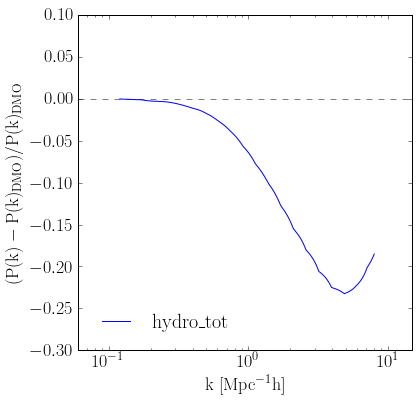

In [98]:
plt.figure(figsize=(6,6))
plt.rc('text', usetex=True)      
plt.rc('font',size=18) 

xvalue=kh_camb[57:237]

plt.axhline(y=0., color='gray', linestyle='--')
plt.plot(xvalue,(iPk_tot-iPk_DMO)/iPk_DMO,c='blue',label=r'$\mathrm{hydro\_tot}$')

plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')
plt.ylabel(r'$\mathrm{(P(k)-P(k)_{DMO})/P(k)_{DMO}}$')

plt.legend(loc='lower left',frameon=False,prop={'size':20})

plt.ylim(-0.3,0.1)
plt.xlim(0.06,15)

In [25]:
Mtot_hist=dm_hist+gas_hist+star_hist+BH_hist

In [26]:
avgM_per_pix = sum(Mtot_hist)/resol**3

In [27]:
den = (Mtot_hist-avgM_per_pix)/avgM_per_pix

In [28]:
den.max()

3988.7052881670834

In [29]:
Mtot_hist.sum()

43112112761341368.0

In [30]:
avgM_per_pix

20557457333.250698

In [31]:
Amp_FFTden=cal_Amp_FFTden(den=den,resol=resol)

In [32]:
k=cal_freq_FFT(boxsize=boxsize,resol=resol)

kmax: 9.28665274488
kmin: 0.0


In [33]:
kbins=np.logspace(-1,1,23)
avgk,avgPk=cal_Pk(kbins=kbins,Amp_FFTden=Amp_FFTden,k=k,Vbox=Vbox)

(0.03, 41)

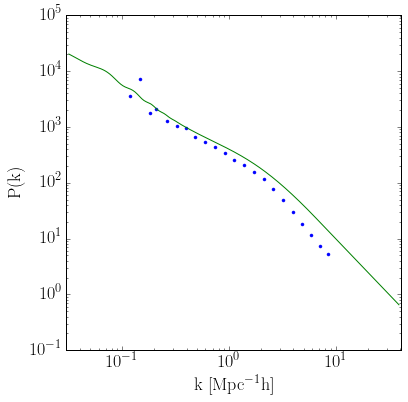

In [34]:
plt.figure(figsize=(6,6))
plt.rc('text', usetex=True)      
plt.rc('font',size=18) 

plt.plot(avgk,avgPk,'.',c='blue')
plt.plot(kh_camb,pk_camb[0],c='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')
plt.ylabel(r'$\mathrm{P(k)}$')

plt.xlim(0.03,41)